# Neural Network Hyperparameter Tuning

## Setup

In [88]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [89]:
!pip install -r requirements.txt

In [90]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [91]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [92]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Split data

In [93]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [95]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

## Building the model

In [96]:
input_shape = (X_train.shape[1], )

In [97]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

## Implement Early Stopping Callback

In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 8,
    restore_best_weights = True
)

In [99]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [100]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[early_stopping], epochs=30)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.7583 - loss: 0.6699 - val_accuracy: 0.8536 - val_loss: 0.4013
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8565 - loss: 0.3926 - val_accuracy: 0.8728 - val_loss: 0.3812
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8718 - loss: 0.3529 - val_accuracy: 0.8742 - val_loss: 0.3606
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8794 - loss: 0.3256 - val_accuracy: 0.8814 - val_loss: 0.3519
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8859 - loss: 0.3069 - val_accuracy: 0.8844 - val_loss: 0.3383
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8921 - loss: 0.2894 - val_accuracy: 0.8846 - val_loss: 0.3429
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8964 - loss: 0.2780 - val_accuracy: 0.8852 - val_loss: 0.3337
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8985 -

In [101]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8867 - loss: 0.3187


[0.3152521550655365, 0.8912000060081482]

In [102]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8787 - loss: 0.3320


[0.3255365192890167, 0.8860999941825867]

## Manually tuning number of layers

In [103]:
def build_model(n_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=input_shape))
    model.add(tf.keras.layers.Dense(100, activation="relu"))

    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(100, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

In [104]:
model_1l = build_model(n_layers=1)
model_1l.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_1l.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7714 - loss: 0.6654 - val_accuracy: 0.8542 - val_loss: 0.4084
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.8559 - loss: 0.4033 - val_accuracy: 0.8680 - val_loss: 0.3667
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8715 - loss: 0.3579 - val_accuracy: 0.8686 - val_loss: 0.3562
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.8808 - loss: 0.3297 - val_accuracy: 0.8714 - val_loss: 0.3529
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8867 - loss: 0.3107 - val_accuracy: 0.8748 - val_loss: 0.3459
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8925 - loss: 0.2945 - val_accuracy: 0.8736 - val_loss: 0.3440
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8974 - loss: 0.2810 - val_accuracy: 0.8798 - val_loss: 0.3334
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9018 - l

In [105]:
model_1l.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8819 - loss: 0.3226


[0.3295362889766693, 0.8827999830245972]

In [106]:
models_per_n_layers = [model_1l]
for n_layers in range(2, 10):
    model = build_model(n_layers=n_layers)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, verbose=0)
    models_per_n_layers.append(model)

In [120]:
def get_model_accuracy(model, X, y):
    return model.evaluate(X, y, verbose=0)[1]

valid_losses = [get_model_accuracy(model, X_valid, y_valid) for model in models_per_n_layers]

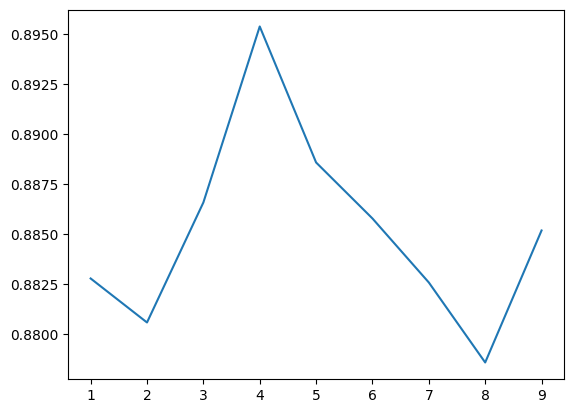

In [121]:
plt.plot(range(1, 10), valid_losses)
plt.show()

## Stretch pants approach for tuning number of neurons per layer

In [126]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Model Checkpoint callback

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "checkpoints/stretchpants_model_checkpoints.weights.h5",
    save_weights_only=True
)

#### Stretch Pants model training

In [128]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stopping])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7718 - loss: 0.6296 - val_accuracy: 0.8498 - val_loss: 0.4172
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8576 - loss: 0.4014 - val_accuracy: 0.8686 - val_loss: 0.3866
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8708 - loss: 0.3570 - val_accuracy: 0.8744 - val_loss: 0.3581
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8801 - loss: 0.3305 - val_accuracy: 0.8792 - val_loss: 0.3533
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8856 - loss: 0.3094 - val_accuracy: 0.8856 - val_loss: 0.3426
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8919 - loss: 0.2916 - val_accuracy: 0.8850 - val_loss: 0.3412
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8965 - loss: 0.2801 - val_accuracy: 0.8902 - val_loss: 0.3438
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9002 - loss: 0.266

In [129]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.4349


[0.4172217845916748, 0.8497999906539917]

## Model analysis with tensorboard

In [134]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="stretchpants_model_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

In [135]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=input_shape),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [136]:
run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    profile_batch=(100, 200)
)

2024-06-14 22:40:18.408841: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-14 22:40:18.408853: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-14 22:40:18.409455: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [137]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [138]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[tensorboard_cb, early_stopping])

Epoch 1/30
 144/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6043 - loss: 1.0895

2024-06-14 22:40:29.164489: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-14 22:40:29.164503: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


 231/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6474 - loss: 0.9682

2024-06-14 22:40:29.626801: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-06-14 22:40:29.655786: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-06-14 22:40:29.662260: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: stretchpants_model_logs/run_2024_06_14_22_40_18/plugins/profile/2024_06_14_22_40_29/Irells-Air-2.Home.xplane.pb


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7730 - loss: 0.6268 - val_accuracy: 0.8524 - val_loss: 0.4323
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8563 - loss: 0.4013 - val_accuracy: 0.8714 - val_loss: 0.3719
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8717 - loss: 0.3576 - val_accuracy: 0.8822 - val_loss: 0.3290
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8796 - loss: 0.3276 - val_accuracy: 0.8770 - val_loss: 0.3443
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8873 - loss: 0.3074 - val_accuracy: 0.8788 - val_loss: 0.3407
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8906 - loss: 0.2923 - val_accuracy: 0.8838 - val_loss: 0.3346
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8997 - loss: 0.2709 - val_accuracy: 0.8876 - val_loss: 0.3351
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9013 - loss: 0.2660 - val_accu

In [141]:
%reload_ext tensorboard
%tensorboard --logdir=./stretchpants_model_logs

Reusing TensorBoard on port 6007 (pid 38552), started 0:00:21 ago. (Use '!kill 38552' to kill it.)